In [1]:
import datetime
import calendar
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Read combined csv file
csvpath = os.path.join( '..','03_Data', 'date-hour-soo-dest-2016.csv')
csvpath1 = os.path.join( '..','03_Data', 'date-hour-soo-dest-2017.csv')
first_df = pd.read_csv(csvpath)
second_df = pd.read_csv(csvpath1)

In [3]:
first_df.head()

,Origin,Destination,Throughput,DateTime
0,12TH,12TH,1,2016-01-01 00:00:00
1,12TH,16TH,1,2016-01-01 00:00:00
2,12TH,24TH,4,2016-01-01 00:00:00
3,12TH,ASHB,4,2016-01-01 00:00:00
4,12TH,BALB,2,2016-01-01 00:00:00


In [4]:
second_df.head()

,Origin,Destination,Throughput,DateTime
0,12TH,19TH,1,2017-01-01 00:00:00
1,12TH,24TH,2,2017-01-01 00:00:00
2,12TH,BAYF,1,2017-01-01 00:00:00
3,12TH,CIVC,5,2017-01-01 00:00:00
4,12TH,COLS,2,2017-01-01 00:00:00


In [5]:
#Add Day of the week
first_df['Day'] = pd.to_datetime(first_df['DateTime']).dt.weekday_name

In [6]:
#Add Month as separate column
first_df['Month'] = pd.to_datetime(first_df['DateTime']).dt.strftime('%b')

In [7]:
#Add Year as separate column
first_df['Year'] = pd.to_datetime(first_df['DateTime']).dt.year

In [8]:
first_df.head()

,Origin,Destination,Throughput,DateTime,Day,Month,Year
0,12TH,12TH,1,2016-01-01 00:00:00,Friday,Jan,2016
1,12TH,16TH,1,2016-01-01 00:00:00,Friday,Jan,2016
2,12TH,24TH,4,2016-01-01 00:00:00,Friday,Jan,2016
3,12TH,ASHB,4,2016-01-01 00:00:00,Friday,Jan,2016
4,12TH,BALB,2,2016-01-01 00:00:00,Friday,Jan,2016


In [9]:
#Add Day of the week
second_df['Day'] = pd.to_datetime(second_df['DateTime']).dt.weekday_name

In [10]:
#Add Month as separate column
second_df['Month'] = pd.to_datetime(second_df['DateTime']).dt.strftime('%b')

In [11]:
#Add Year as separate column
second_df['Year'] = pd.to_datetime(second_df['DateTime']).dt.year

In [12]:
second_df.head()

,Origin,Destination,Throughput,DateTime,Day,Month,Year
0,12TH,19TH,1,2017-01-01 00:00:00,Sunday,Jan,2017
1,12TH,24TH,2,2017-01-01 00:00:00,Sunday,Jan,2017
2,12TH,BAYF,1,2017-01-01 00:00:00,Sunday,Jan,2017
3,12TH,CIVC,5,2017-01-01 00:00:00,Sunday,Jan,2017
4,12TH,COLS,2,2017-01-01 00:00:00,Sunday,Jan,2017


In [13]:
#pivot 2016 data for total passengers by origin station
pivot_first_origin = first_df.pivot_table(index=["Origin"], values=["Throughput"],aggfunc=np.sum).reset_index()

In [14]:
#Save CSV file
pivot_first_origin.to_csv("2016 Throughput Origin pivot.csv")

In [15]:
pivot_first_origin.head()

,Origin,Throughput
0,12TH,659535
1,16TH,678521
2,19TH,627232
3,24TH,686647
4,ASHB,285726


In [16]:
#pivot 2016 data for total passengers by destination station
pivot_first_dest = first_df.pivot_table(index=["Destination"], values=["Throughput"],aggfunc=np.sum).reset_index()

In [17]:
#Save CSV file
pivot_first_dest.to_csv("2016 Throughput Destination pivot.csv")

In [18]:
#pivot 2017 data for total passengers by origin station
pivot_second_origin = second_df.pivot_table(index=["Origin"], values=["Throughput"],aggfunc=np.sum).reset_index()

In [19]:
#Save CSV file
pivot_second_origin.to_csv("2017 Throughput Origin pivot.csv")

In [20]:
#pivot 2017 data for total passengers by destination station
pivot_second_dest = second_df.pivot_table(index=["Destination"], values=["Throughput"],aggfunc=np.sum).reset_index()

In [21]:
#Save CSV file
pivot_second_dest.to_csv("2017 Throughput Destination pivot.csv")

In [22]:
pivot_first_origin.columns

Index(['Origin', 'Throughput'], dtype='object')

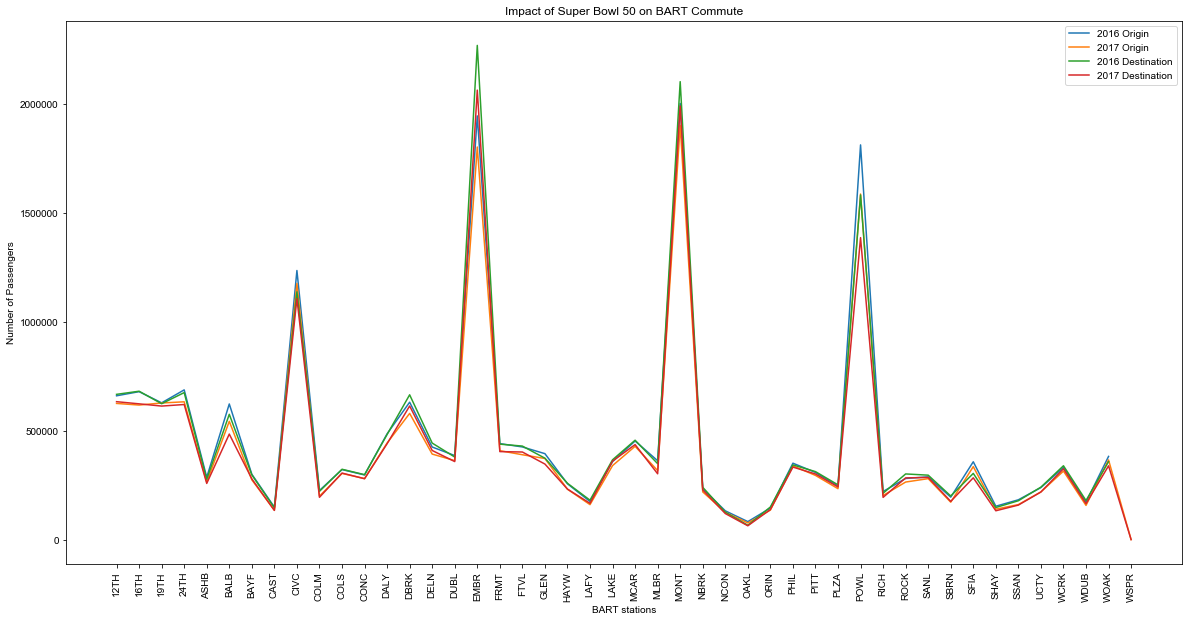

In [23]:
plt.figure(figsize=(20,10))
plt.title("Impact of Super Bowl 50 on BART Commute")
plt.ylabel("Number of Passengers")
plt.xlabel("BART stations")
#plot News channels
tick=second_df.Origin.unique()
plt.plot(np.arange(len(pivot_first_origin)),pivot_first_origin['Throughput'],label="2016 Origin")
plt.plot(np.arange(len(pivot_second_origin)),pivot_second_origin['Throughput'],label="2017 Origin")
plt.plot(np.arange(len(pivot_first_dest)),pivot_first_dest['Throughput'],label="2016 Destination")
plt.plot(np.arange(len(pivot_second_dest)),pivot_second_dest['Throughput'],label="2017 Destination")
plt.xticks(np.arange(len(tick)),tick,rotation='vertical')
plt.legend(loc='best')
sns.set()
#Save Plot
plt.savefig("Super_Bowl_compare.png")
plt.show()

In [24]:
#Group Pivot by weekdays
pivot_weekly_2016 = first_df.pivot_table(index=["Day"], values=["Throughput"],aggfunc=np.sum).reset_index()
pivot_weekly_2017 = second_df.pivot_table(index=["Day"], values=["Throughput"],aggfunc=np.sum).reset_index()
pivot_weekly_2017

,Day,Throughput
0,Friday,3161629
1,Monday,2962879
2,Saturday,1619055
3,Sunday,1048851
4,Thursday,3430057
5,Tuesday,3760150
6,Wednesday,3424106


In [25]:
pivot_weekly_2016

,Day,Throughput
0,Friday,3601898
1,Monday,3401371
2,Saturday,2029209
3,Sunday,1265651
4,Thursday,3595722
5,Tuesday,3494272
6,Wednesday,3532409


In [26]:
#Re-indexing based on weekdays
weekdays=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(weekdays)}
key = pivot_weekly_2016['Day'].map(mapping)

pivot_weekly_2016 = pivot_weekly_2016.iloc[key.argsort()].set_index('Day')
pivot_weekly_2017 = pivot_weekly_2017.iloc[key.argsort()].set_index('Day')

In [27]:
pivot_weekly_2016

,Throughput
Day,
Monday,3401371
Tuesday,3494272
Wednesday,3532409
Thursday,3595722
Friday,3601898
Saturday,2029209
Sunday,1265651


In [28]:
pivot_weekly_2017

,Throughput
Day,
Monday,2962879
Tuesday,3760150
Wednesday,3424106
Thursday,3430057
Friday,3161629
Saturday,1619055
Sunday,1048851


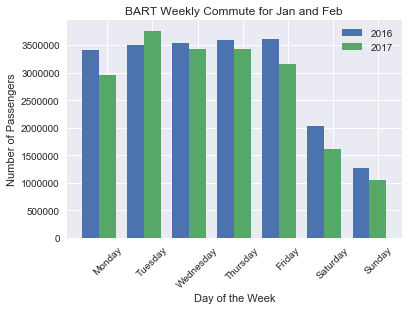

In [49]:
#plot commuter details
fig, ax = plt.subplots()
index = np.arange(0,7*2,2)
bar_width = .75
rects1 = plt.bar(index-bar_width,pivot_weekly_2016['Throughput'],label="2016",width=bar_width)
rects2 = plt.bar(index,pivot_weekly_2017['Throughput'],label="2017",width=bar_width)

plt.xticks(index,weekdays,rotation=45)
plt.title("BART Weekly Commute for Jan and Feb")
plt.ylabel("Number of Passengers")
plt.xlabel("Day of the Week")
plt.legend(loc='best')
#Save Plot
plt.savefig("Weekly Commute.png")
plt.show()